In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ganja.plotting as plotting
from scipy import stats

import matplotlib
matplotlib.style.use('seaborn-poster')

Using TensorFlow backend.


In [30]:
#df00 = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid10.hd5')
#df01 = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_5k_10.hd5')

lx = [pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_'+str(x)+'.hd5') for x in range(10)]
[df0, df1, df2, df3, df4, df5, df6, df7, df8, df9] = lx

Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_0.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_1.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_2.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_3.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_4.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_5.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_6.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_7.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gto

In [3]:
df0.columns

Index(['eta', 'npu', 'phi', 'pred_maja', 'pred_mina', 'pred_ptD', 'pred_ring0',
       'pred_ring1', 'pred_ring2', 'pred_ring3', 'pred_ring4', 'pred_tau1',
       'pred_tau2', 'pred_tau21', 'pred_tau3', 'pred_tau32', 'pred_total',
       'pt', 'reco_maja', 'reco_mina', 'reco_ptD', 'reco_ring0', 'reco_ring1',
       'reco_ring2', 'reco_ring3', 'reco_ring4', 'reco_tau1', 'reco_tau2',
       'reco_tau21', 'reco_tau3', 'reco_tau32', 'reco_total'],
      dtype='object')

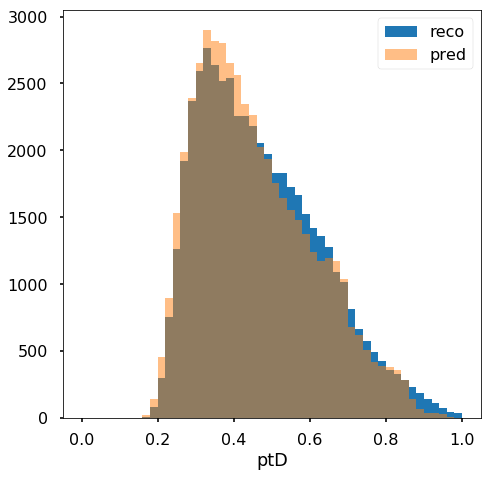

In [4]:
plotting.distrib_metric(df8['reco_ptD'],df8['pred_ptD'],xlabel="ptD",bins=50,range=[0,1])

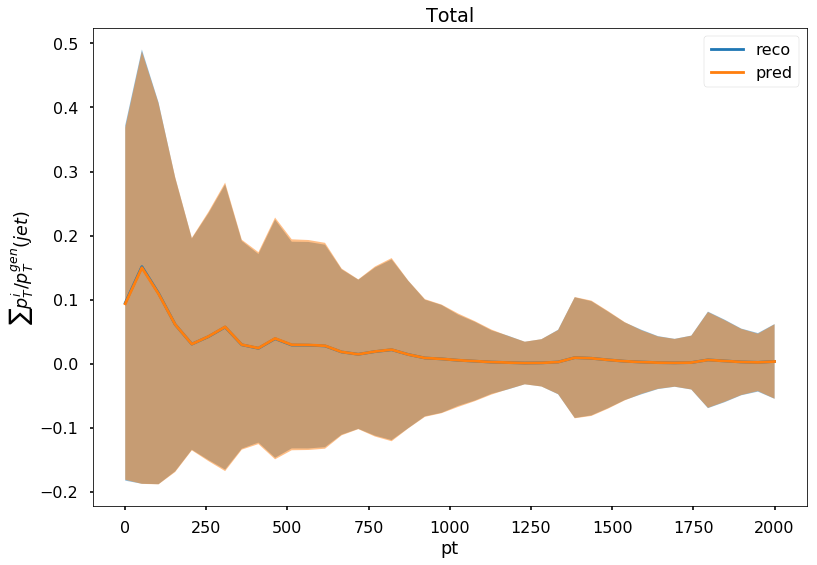

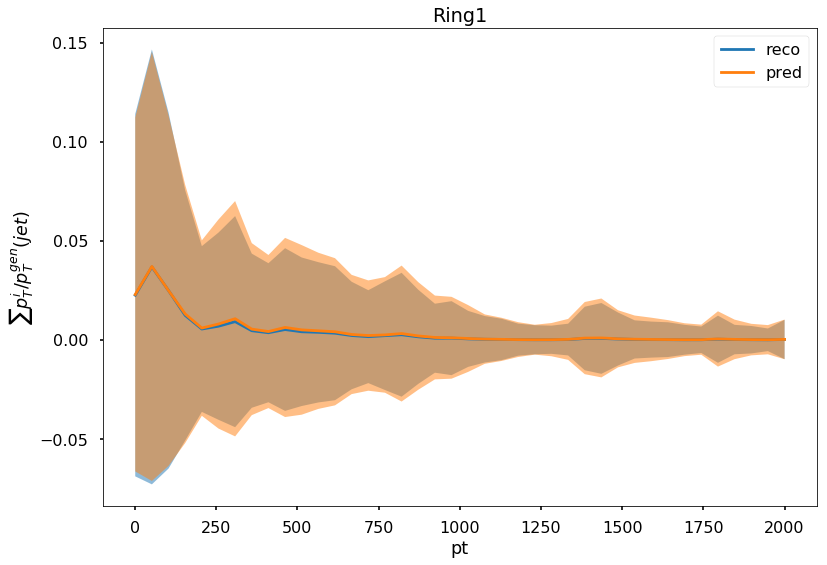

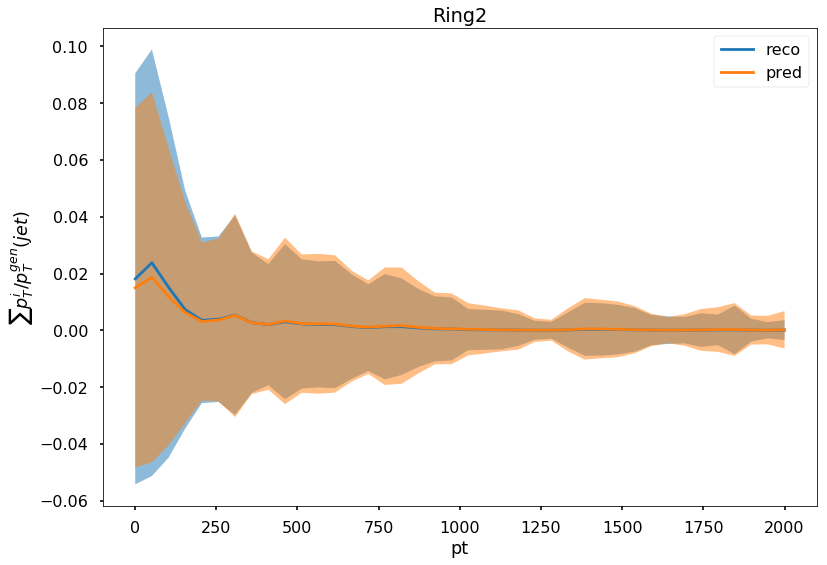

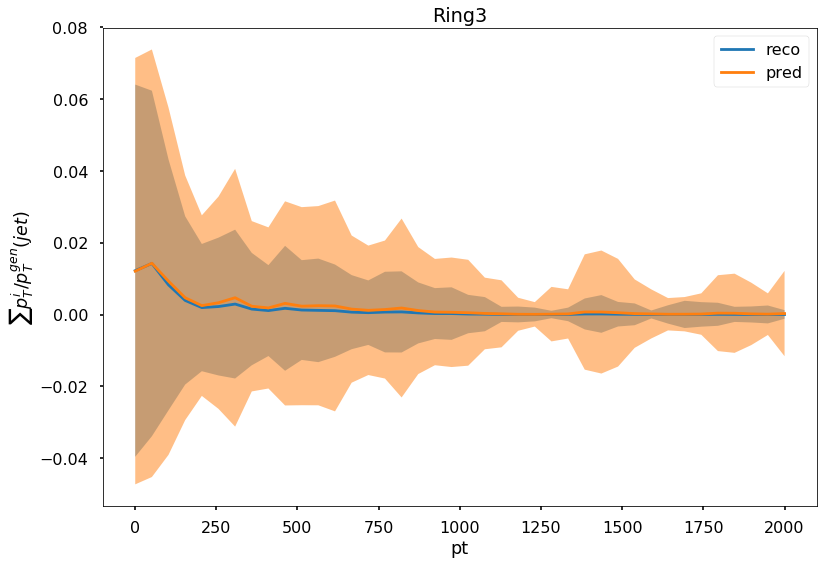

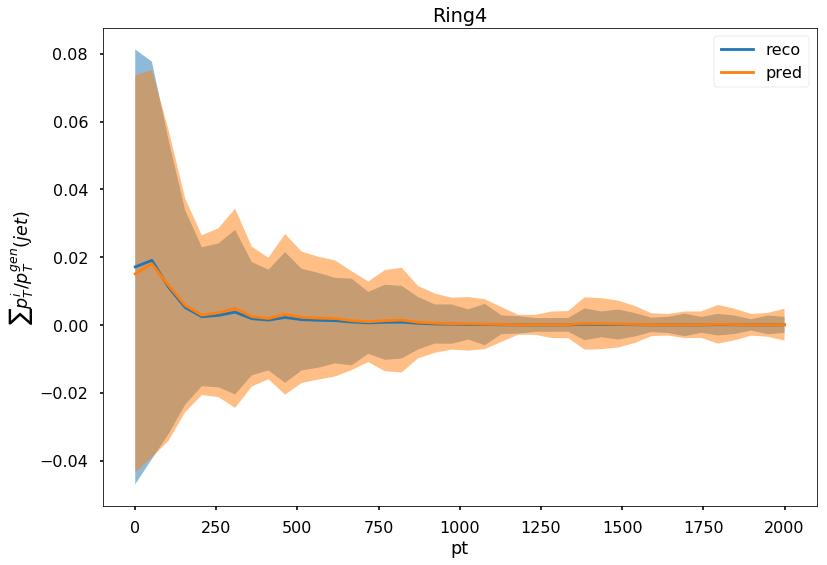

In [5]:
plotting.show_moments(df3['reco_total'].as_matrix(),df3['pred_total'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Total')
plt.show()
plotting.show_moments(df3['reco_ring1'].as_matrix(),df3['pred_ring1'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring1')
plt.show()
plotting.show_moments(df3['reco_ring2'].as_matrix(),df3['pred_ring2'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring2')
plt.show()
plotting.show_moments(df3['reco_ring3'].as_matrix(),df3['pred_ring3'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring3')
plt.show()
plotting.show_moments(df3['reco_ring4'].as_matrix(),df3['pred_ring4'].as_matrix(),df3['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring4')
plt.show()

In [34]:
#ks_tot = [stats.ks_2samp(x['reco_ptD'],x['pred_ptD'])[0] for x in lx]  #ks values at different epochs, whole ptD domain
pt= df0['pt']
dx = [np.percentile(pt,n) for n in np.arange(0,101,10)]   #decile pt values


def plot_ks(var):                          #plot ks value of a variable, for different epochs and pt bins
    for i in np.arange(1,len(dx)):         #decile loop
        upper, lower = dx[i], dx[i-1]
        ptD_r_ring = df0['reco_'+var][(pt<upper)&(pt>=lower)]
        ksx = [stats.ks_2samp(ptD_r_ring,x['pred_'+var][(pt>=lower)&(pt<upper)])[0] for x in lx]
        plt.plot(range(10),ksx,label=str(i-1)+'0 - '+str(i)+'0th percentile')
    

    plt.xlabel("Training Epochs")
    plt.title("Ks value of "+var+" distribution during training, by pt decile bins")
    plt.legend()
    plt.show()

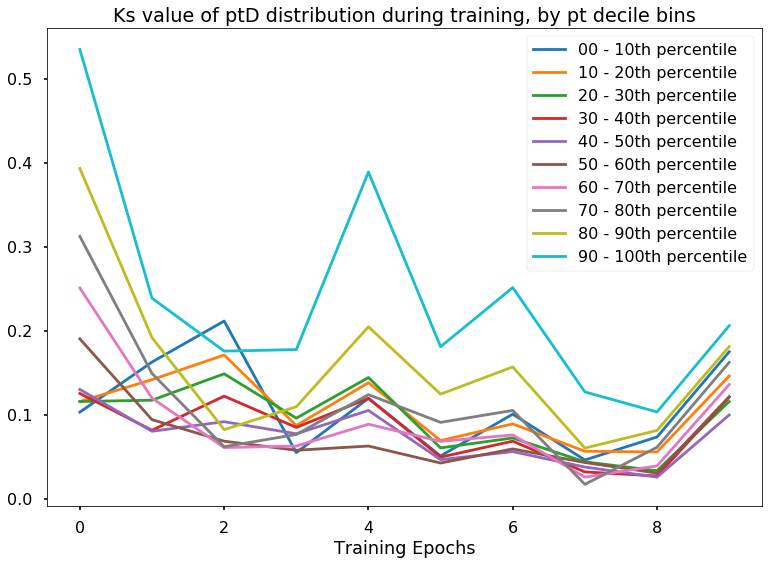

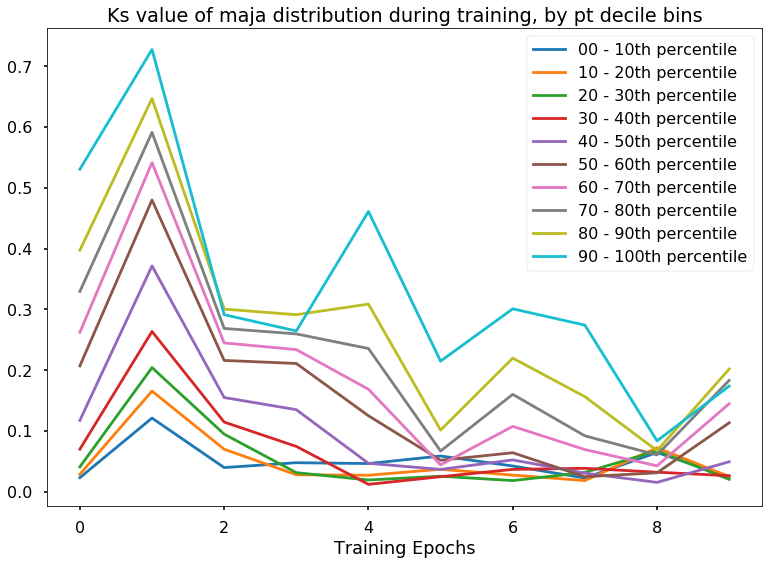

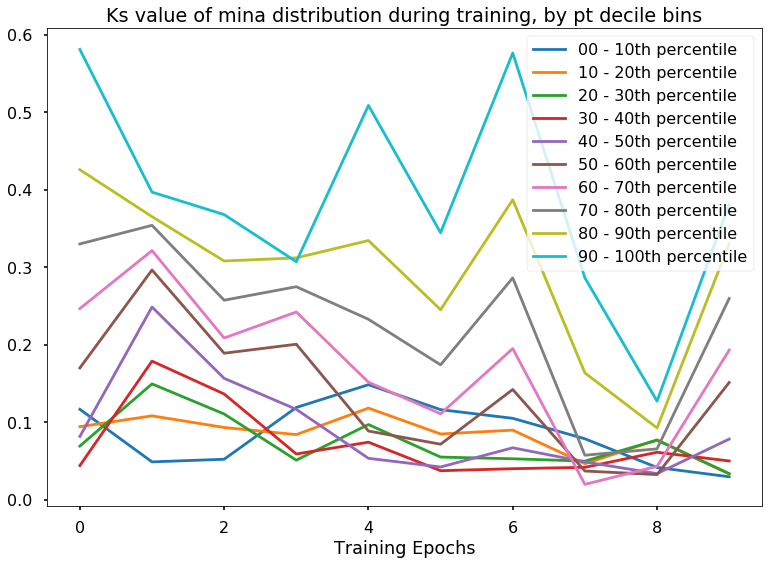

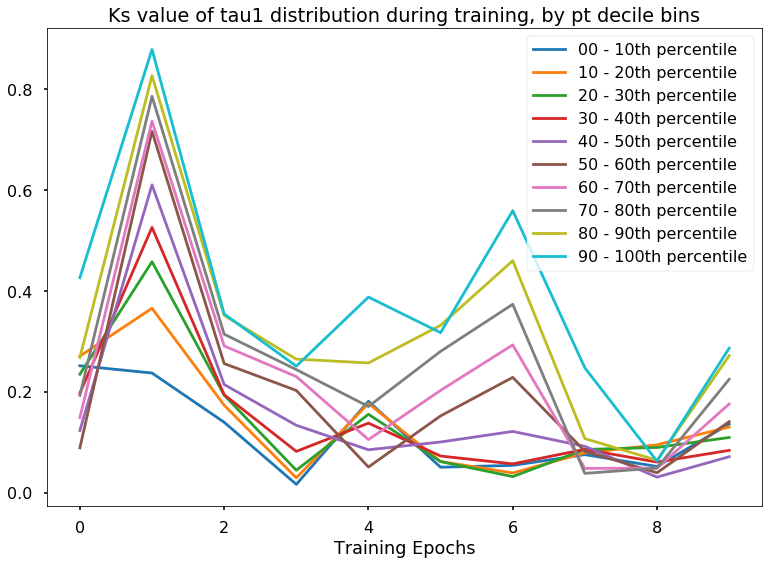

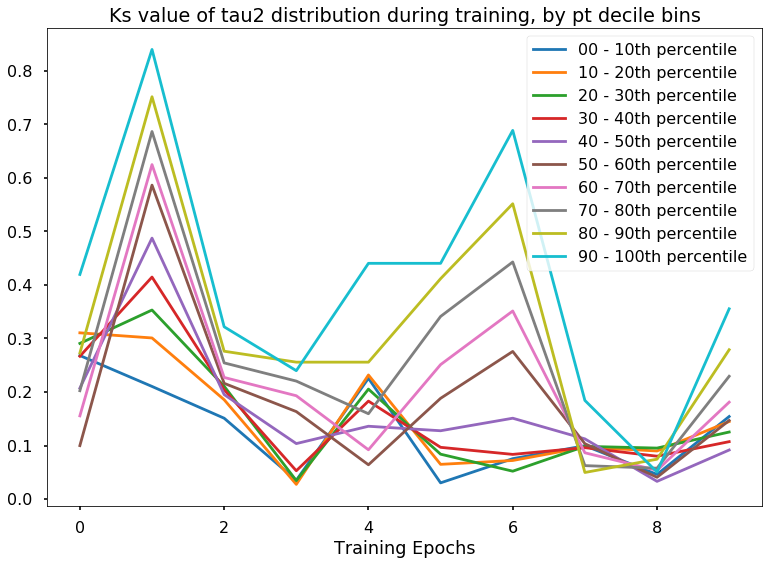

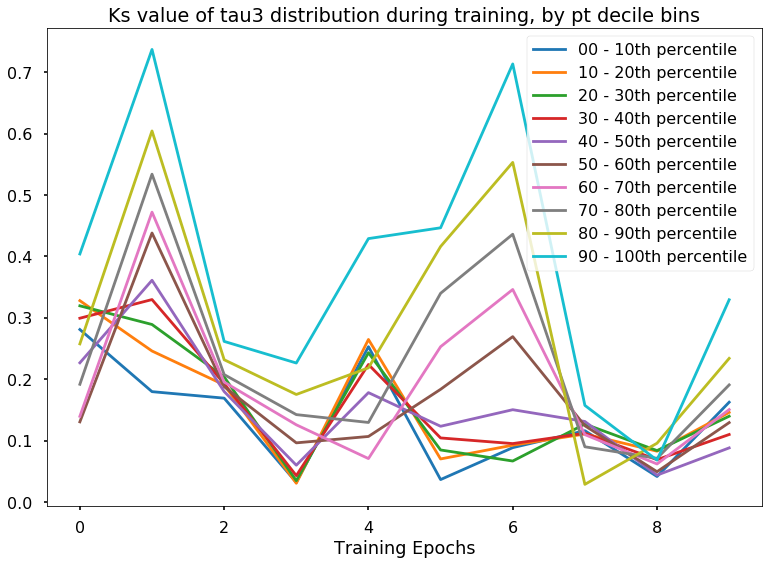

In [35]:
for v in ['ptD', 'maja', 'mina', 'tau1','tau2', 'tau3']: plot_ks(v)